In [1]:
import os
import time
import random
import pickle
import warnings
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

from utils import *
from proposal import SimVPTEST2

In [2]:
# ignore warning message
warnings.filterwarnings('ignore')

# fix seed
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [3]:
if torch.cuda.is_available():
    print(f'GPU count: {torch.cuda.device_count()}')
    for i in range(torch.cuda.device_count()):
        print(f'GPU {i}: {torch.cuda.get_device_name(i)}')
        print(torch.cuda.get_device_properties(i))
else:
    print('No GPU')

GPU count: 2
GPU 0: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)
GPU 1: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)


In [4]:
# data : 2017~2021년 5월 31일까지의 전력 사용량 데이터
# train : 2017~2019년 3년동안의 전력 사용량 데이터(3년)
# val : 2020년 1년동안의 전력 사용량 데이터(1년)
# test : 2021년 5월 31일 6개월 동안의 전력 사용량 데이터(6개월)
elec = np.expand_dims(np.load('./dataset/2d_elec.npy'), axis=1)
elec_x, elec_y, elec_val = make_sequential(elec)

train_X = elec_x[:(365*24*3)]
train_y = elec_y[:(365*24*3)]

val_X = elec_x[(365*24*3):(365*24*4)]
val_y = elec_y[(365*24*3):(365*24*4)]

test_X = elec_x[(365*24*4):]
test_y = elec_y[(365*24*4):]

In [5]:
train_dataset = CustomDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, 64, pin_memory=True)

val_dataset = CustomDataset(val_X, val_y)
val_loader = DataLoader(val_dataset, 64, pin_memory=True)

test_dataset = CustomDataset(test_X, test_y)
test_loader = DataLoader(test_dataset, 64, pin_memory=True)

In [6]:
print(f'train_size: {len(train_dataset)}')
print(train_dataset.X.shape)
print(train_dataset.Y.shape)

print(f'val_size: {len(val_dataset)}')
print(val_dataset.X.shape)
print(val_dataset.Y.shape)

print(f'test_size: {len(test_dataset)}')
print(test_dataset.X.shape)
print(test_dataset.Y.shape)

train_size: 26280
(26280, 24, 1, 8, 20)
(26280, 24, 1, 8, 20)
val_size: 8760
(8760, 24, 1, 8, 20)
(8760, 24, 1, 8, 20)
test_size: 3577
(3577, 24, 1, 8, 20)
(3577, 24, 1, 8, 20)


In [8]:
X, _ = next(iter(train_loader))

path = './save_model/SimVPChannel/'
check_path(path)
model = SimVPTEST2(X.shape[1:])

In [9]:
optimizer = torch.optim.AdamW(model.parameters(), lr=.001)
criterion = nn.MSELoss()
epochs = 100
# gpu 1 사용
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_loss, val_loss = train(model, optimizer, criterion, epochs, train_loader, val_loader, device, path=path+'best_SimVPChannel')

100%|██████████| 137/137 [00:02<00:00, 57.62it/s]


Epoch [1/100] 31.03s
loss: 0.0055 | val_loss: 0.0047


100%|██████████| 137/137 [00:02<00:00, 63.37it/s]


Epoch [2/100] 28.71s
loss: 0.0042 | val_loss: 0.0049


100%|██████████| 137/137 [00:02<00:00, 63.91it/s]


Epoch [3/100] 28.15s
loss: 0.0036 | val_loss: 0.0049


100%|██████████| 137/137 [00:02<00:00, 62.57it/s]


Epoch [4/100] 27.98s
loss: 0.0033 | val_loss: 0.0043


100%|██████████| 137/137 [00:02<00:00, 67.19it/s]


Epoch [5/100] 28.29s
loss: 0.0032 | val_loss: 0.0044


100%|██████████| 137/137 [00:02<00:00, 65.47it/s]


Epoch [6/100] 27.86s
loss: 0.0032 | val_loss: 0.0042


100%|██████████| 137/137 [00:02<00:00, 62.11it/s]


Epoch [7/100] 28.52s
loss: 0.0031 | val_loss: 0.0040


100%|██████████| 137/137 [00:02<00:00, 63.91it/s]


Epoch [8/100] 28.35s
loss: 0.0030 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 62.12it/s]


Epoch [9/100] 28.21s
loss: 0.0030 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 62.29it/s]


Epoch [10/100] 28.55s
loss: 0.0030 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 60.57it/s]


Epoch [11/100] 27.70s
loss: 0.0029 | val_loss: 0.0040


100%|██████████| 137/137 [00:02<00:00, 58.84it/s]


Epoch [12/100] 28.16s
loss: 0.0029 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 59.17it/s]


Epoch [13/100] 28.66s
loss: 0.0029 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 61.77it/s]


Epoch [14/100] 27.91s
loss: 0.0028 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 58.79it/s]


Epoch [15/100] 28.20s
loss: 0.0028 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 58.82it/s]


Epoch [16/100] 28.91s
loss: 0.0028 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 59.63it/s]


Epoch [17/100] 29.28s
loss: 0.0028 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 61.37it/s]


Epoch [18/100] 28.48s
loss: 0.0028 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 59.14it/s]


Epoch [19/100] 28.16s
loss: 0.0028 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 60.18it/s]


Epoch [20/100] 28.34s
loss: 0.0027 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 60.93it/s]


Epoch [21/100] 27.96s
loss: 0.0027 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 61.52it/s]


Epoch [22/100] 28.22s
loss: 0.0027 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 61.20it/s]


Epoch [23/100] 28.37s
loss: 0.0027 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 60.88it/s]


Epoch [24/100] 28.05s
loss: 0.0026 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 59.94it/s]


Epoch [25/100] 28.56s
loss: 0.0026 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 61.24it/s]


Epoch [26/100] 28.47s
loss: 0.0025 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 59.71it/s]


Epoch [27/100] 28.30s
loss: 0.0025 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 61.71it/s]


Epoch [28/100] 28.54s
loss: 0.0025 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 59.04it/s]


Epoch [29/100] 28.75s
loss: 0.0024 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 60.58it/s]


Epoch [30/100] 28.52s
loss: 0.0025 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 60.01it/s]


Epoch [31/100] 28.75s
loss: 0.0024 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 59.93it/s]


Epoch [32/100] 28.24s
loss: 0.0024 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 59.73it/s]


Epoch [33/100] 28.34s
loss: 0.0023 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 61.74it/s]


Epoch [34/100] 28.08s
loss: 0.0023 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 61.59it/s]


Epoch [35/100] 27.88s
loss: 0.0023 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 61.93it/s]


Epoch [36/100] 28.62s
loss: 0.0022 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 63.28it/s]


Epoch [37/100] 28.54s
loss: 0.0022 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 61.99it/s]


Epoch [38/100] 28.42s
loss: 0.0022 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 62.98it/s]


Epoch [39/100] 28.02s
loss: 0.0021 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 63.70it/s]


Epoch [40/100] 27.74s
loss: 0.0021 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 66.24it/s]


Epoch [41/100] 27.81s
loss: 0.0021 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 66.16it/s]


Epoch [42/100] 28.00s
loss: 0.0020 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 64.85it/s]


Epoch [43/100] 27.92s
loss: 0.0020 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 64.55it/s]


Epoch [44/100] 28.28s
loss: 0.0020 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 63.45it/s]


Epoch [45/100] 28.69s
loss: 0.0020 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 62.68it/s]


Epoch [46/100] 28.37s
loss: 0.0020 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 60.15it/s]


Epoch [47/100] 28.17s
loss: 0.0019 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 59.07it/s]


Epoch [48/100] 27.61s
loss: 0.0020 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 60.38it/s]


Epoch [49/100] 28.29s
loss: 0.0020 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 62.84it/s]


Epoch [50/100] 28.28s
loss: 0.0019 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 60.83it/s]


Epoch [51/100] 28.25s
loss: 0.0018 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 58.93it/s]


Epoch [52/100] 28.04s
loss: 0.0018 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 60.69it/s]


Epoch [53/100] 28.08s
loss: 0.0017 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 60.15it/s]


Epoch [54/100] 28.42s
loss: 0.0016 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 60.58it/s]


Epoch [55/100] 28.20s
loss: 0.0016 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 60.07it/s]


Epoch [56/100] 28.74s
loss: 0.0016 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 61.49it/s]


Epoch [57/100] 28.43s
loss: 0.0016 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 60.08it/s]


Epoch [58/100] 28.32s
loss: 0.0015 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 61.12it/s]


Epoch [59/100] 28.39s
loss: 0.0015 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 60.86it/s]


Epoch [60/100] 28.12s
loss: 0.0015 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 59.40it/s]


Epoch [61/100] 28.51s
loss: 0.0015 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 60.50it/s]


Epoch [62/100] 28.15s
loss: 0.0015 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 61.66it/s]


Epoch [63/100] 29.73s
loss: 0.0015 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 64.68it/s]


Epoch [64/100] 28.29s
loss: 0.0014 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 60.33it/s]


Epoch [65/100] 28.40s
loss: 0.0014 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 60.50it/s]


Epoch [66/100] 28.53s
loss: 0.0015 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 62.60it/s]


Epoch [67/100] 27.86s
loss: 0.0015 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 60.47it/s]


Epoch [68/100] 28.22s
loss: 0.0015 | val_loss: 0.0022


100%|██████████| 137/137 [00:02<00:00, 61.61it/s]


Epoch [69/100] 28.34s
loss: 0.0014 | val_loss: 0.0022


100%|██████████| 137/137 [00:02<00:00, 61.99it/s]


Epoch [70/100] 28.40s
loss: 0.0014 | val_loss: 0.0022


100%|██████████| 137/137 [00:02<00:00, 61.23it/s]


Epoch [71/100] 28.09s
loss: 0.0014 | val_loss: 0.0022


100%|██████████| 137/137 [00:02<00:00, 60.55it/s]


Epoch [72/100] 28.16s
loss: 0.0013 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 59.85it/s]


Epoch [73/100] 28.24s
loss: 0.0013 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 61.93it/s]


Epoch [74/100] 28.01s
loss: 0.0013 | val_loss: 0.0020


100%|██████████| 137/137 [00:02<00:00, 58.65it/s]


Epoch [75/100] 28.37s
loss: 0.0013 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 59.57it/s]


Epoch [76/100] 28.12s
loss: 0.0012 | val_loss: 0.0019


100%|██████████| 137/137 [00:02<00:00, 61.21it/s]


Epoch [77/100] 28.57s
loss: 0.0012 | val_loss: 0.0019


100%|██████████| 137/137 [00:02<00:00, 63.52it/s]


Epoch [78/100] 28.23s
loss: 0.0011 | val_loss: 0.0019


100%|██████████| 137/137 [00:02<00:00, 64.51it/s]


Epoch [79/100] 28.52s
loss: 0.0011 | val_loss: 0.0020


100%|██████████| 137/137 [00:02<00:00, 62.73it/s]


Epoch [80/100] 28.41s
loss: 0.0010 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 59.51it/s]


Epoch [81/100] 28.85s
loss: 0.0010 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 60.83it/s]


Epoch [82/100] 28.15s
loss: 0.0010 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 60.64it/s]


Epoch [83/100] 27.83s
loss: 0.0010 | val_loss: 0.0023


100%|██████████| 137/137 [00:02<00:00, 61.65it/s]


Epoch [84/100] 27.76s
loss: 0.0010 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 59.88it/s]


Epoch [85/100] 28.01s
loss: 0.0010 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 60.98it/s]


Epoch [86/100] 28.35s
loss: 0.0009 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 60.53it/s]


Epoch [87/100] 28.59s
loss: 0.0009 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 62.75it/s]


Epoch [88/100] 28.20s
loss: 0.0009 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 61.89it/s]


Epoch [89/100] 27.30s
loss: 0.0009 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 60.06it/s]


Epoch [90/100] 28.33s
loss: 0.0009 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 60.81it/s]


Epoch [91/100] 28.59s
loss: 0.0009 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 63.24it/s]


Epoch [92/100] 28.30s
loss: 0.0008 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 62.09it/s]


Epoch [93/100] 28.09s
loss: 0.0008 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 60.45it/s]


Epoch [94/100] 28.42s
loss: 0.0008 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 59.99it/s]


Epoch [95/100] 28.86s
loss: 0.0008 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 60.15it/s]


Epoch [96/100] 28.44s
loss: 0.0008 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 60.34it/s]


Epoch [97/100] 28.49s
loss: 0.0008 | val_loss: 0.0032


100%|██████████| 137/137 [00:01<00:00, 73.66it/s]


Epoch [98/100] 25.36s
loss: 0.0007 | val_loss: 0.0032


100%|██████████| 137/137 [00:01<00:00, 76.36it/s]


Epoch [99/100] 29.35s
loss: 0.0007 | val_loss: 0.0031


100%|██████████| 137/137 [00:01<00:00, 71.79it/s]

Epoch [100/100] 30.12s
loss: 0.0007 | val_loss: 0.0033
Train time: 2838.70s
Best Epoch: 78, Best mse: 0.0019


In [10]:
with open(path + "train_loss.pkl","wb") as f:
    pickle.dump(train_loss, f)
    
with open(path + "val_loss.pkl","wb") as f:
    pickle.dump(val_loss, f)

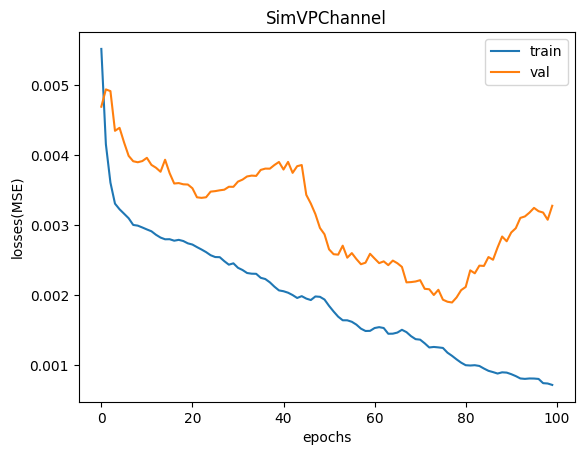

In [11]:
plt.title('SimVPChannel')
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('losses(MSE)')
plt.legend()
plt.show()